## Hyposthesis Testing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [2]:
mutual_fund_data["Category3"].value_counts()


Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [3]:
mutual_fund_data.groupby("Category3").mean()

,Morningstar Rating
Category3,
Communication Services,5.000000
Health care,5.000000
Large cap,3.658824
Mid cap,4.000000
Small cap,4.000000


In [4]:
mutual_fund_data["Morningstar Rating"].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [8]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = []
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1,1)
end = datetime(2020,1,1)
print((start, end, symbols))

(datetime.datetime(1980, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX'])


In [9]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [10]:
close_data = fund_data["Adj Close"]
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730549,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580032,NaN,NaN,NaN,NaN,0.304549,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097595,43.498634,33.953674,41.269047,41.468189,28.316500,28.111414,38.230675,38.514614,51.184906,...,42.597168,80.298599,43.188065,32.569065,106.341019,29.883808,43.968906,14.698989,29.131346,36.265900
2019-12-26,38.185303,43.719612,34.099625,41.387012,41.586231,28.408522,28.203419,38.318680,38.603233,51.416248,...,42.654209,80.374329,43.536549,32.785183,107.248016,30.146881,44.383232,14.812881,29.243481,36.535656
2019-12-27,38.211605,43.711113,34.099625,41.441452,41.640713,28.400158,28.186689,38.345089,38.629826,51.465828,...,42.504475,80.290176,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243481,36.501934


In [14]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


[*********************100%***********************]  1 of 1 completed


C:\Users\adamp\AppData\Local\Temp\ipykernel_6464\28948791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


Text(0.5, 1.0, 'Index Returns Relative to Market Return')

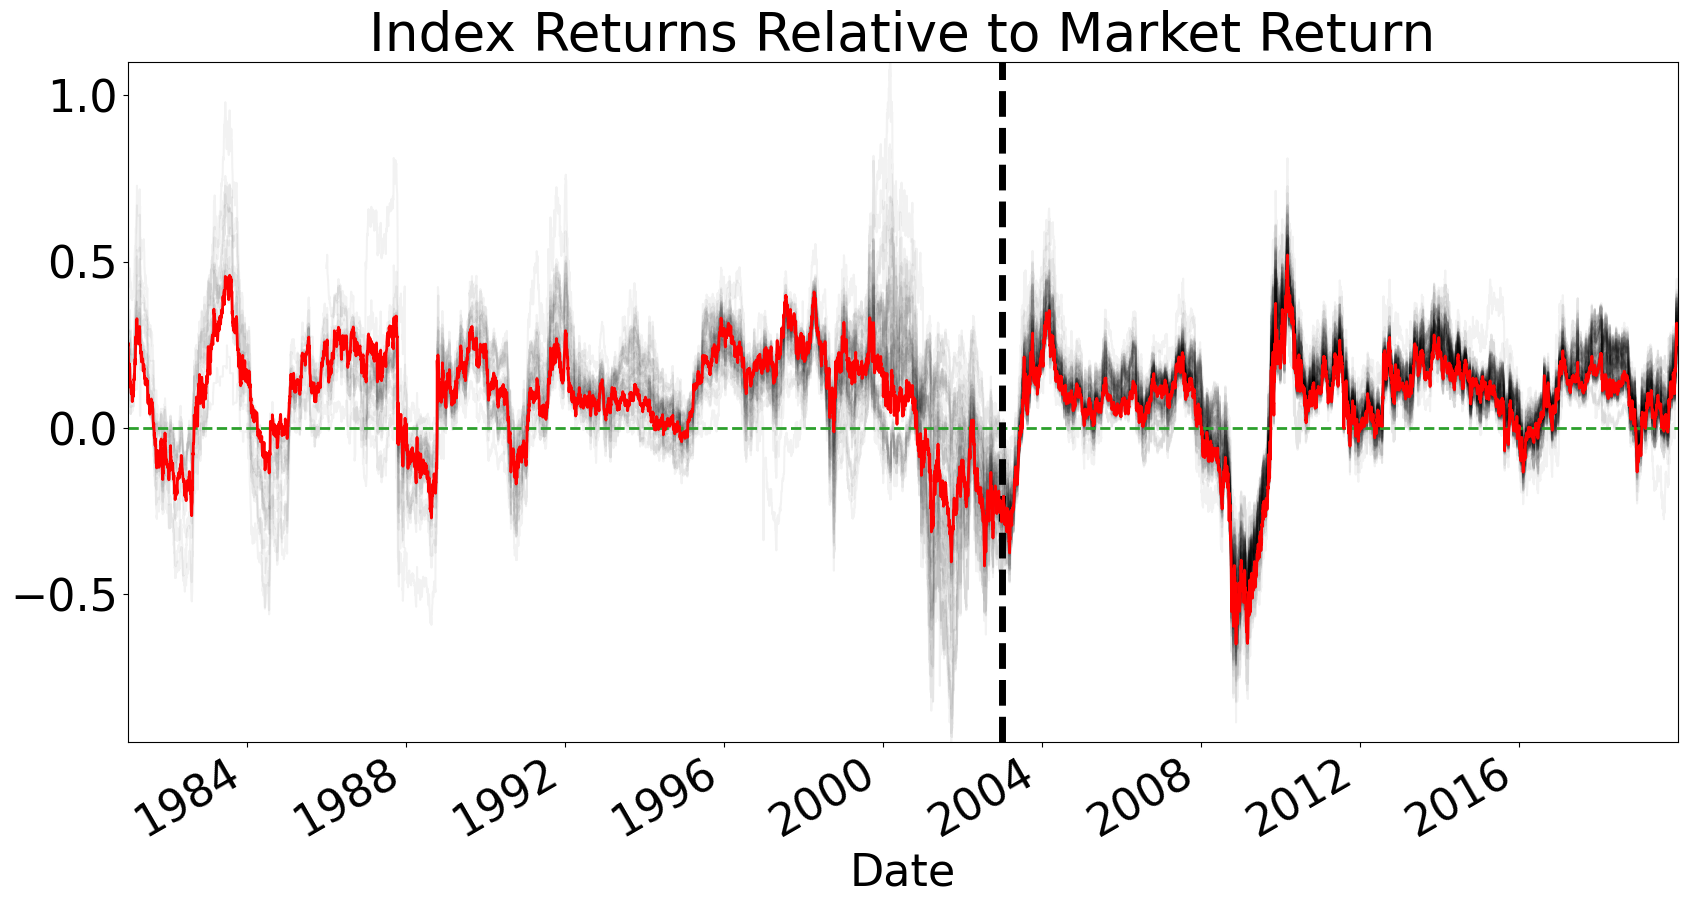

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
# year over year rates of change are easier to interpret
days_per_year = 251
yoy_return = np.log(close_data).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

In [20]:
for year in range(1980, 2021):
    year = str(year)
    print(close_data.loc[str(year)].shape[0])

253
253
253
253
253
252
253
253
253
252
253
253
254
253
252
252
254
253
252
252
252
248
252
252
252
252
251
251
253
252
252
252
250
252
252
252
252
251
251
252


KeyError: '2020'

In [21]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126400,39.759945,30.990511,39.542534,39.713707,25.792034,25.624294,35.268578,35.560005,46.166389,...,76.018021,40.260963,30.476662,99.783806,27.435658,39.930313,13.367850,26.328794,33.576427,2953.560059
2019-09-30,35.185394,38.784580,30.445379,40.388550,40.560371,25.256035,25.087616,35.319347,35.611183,45.121582,...,74.580856,39.150578,30.370672,97.703728,26.914337,38.901051,13.186357,25.675346,32.912346,2906.270020
2019-10-31,35.645607,38.633915,30.624966,39.771664,39.951832,25.128031,24.959455,35.779797,36.065323,45.679516,...,73.918167,39.294098,29.346066,96.186302,26.883211,39.103668,13.086225,26.262714,32.483128,2940.250000
2019-11-30,36.493103,40.663937,31.833948,40.644115,40.824951,26.328033,26.144951,36.630486,36.913818,48.072182,...,76.337387,40.850147,30.045616,100.013977,28.065914,41.202702,13.774644,27.672400,33.916561,3066.909912
2019-12-31,36.976173,41.718601,32.544647,40.555988,40.745579,27.064037,26.873871,37.106861,37.385201,49.166866,...,77.942230,41.703709,31.162083,102.793091,28.867355,42.458881,14.081302,28.127607,34.872189,3113.870117


In [22]:
 monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012486,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005741,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021169,0.021095,-0.021001,-0.021167,0.001438,0.001438,-0.022891,...,-0.019087,-0.027967,-0.003484,-0.021066,-0.019184,-0.026115,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012952,0.012672,0.012289,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023558,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013150,0.025605,0.022080,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028156,0.030032,0.022018,0.016316,0.027786,0.015196


In [23]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n -1
    t = (x_bar-mu)/(s/np.sqrt(n))
    
    return t, df

In [24]:
sp500 = monthly_returns["S&P 500"].dropna()

In [25]:
sp500.mean() * 12

0.08473776816463623

In [26]:
hypothesized_rate = 0.07 / 12
hypothesized_rate

0.005833333333333334

In [27]:
t_value_1samp(data=sp500, mu=hypothesized_rate)

(0.6072595645765047, 478)

In [28]:
def t_value_ind_samples(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [29]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.00712472839696384)

In [30]:
t_value_ind_samples(sp500, prgfx)

(-0.021224804162224224, 950.1086032267618)

### T Distribution

In [31]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

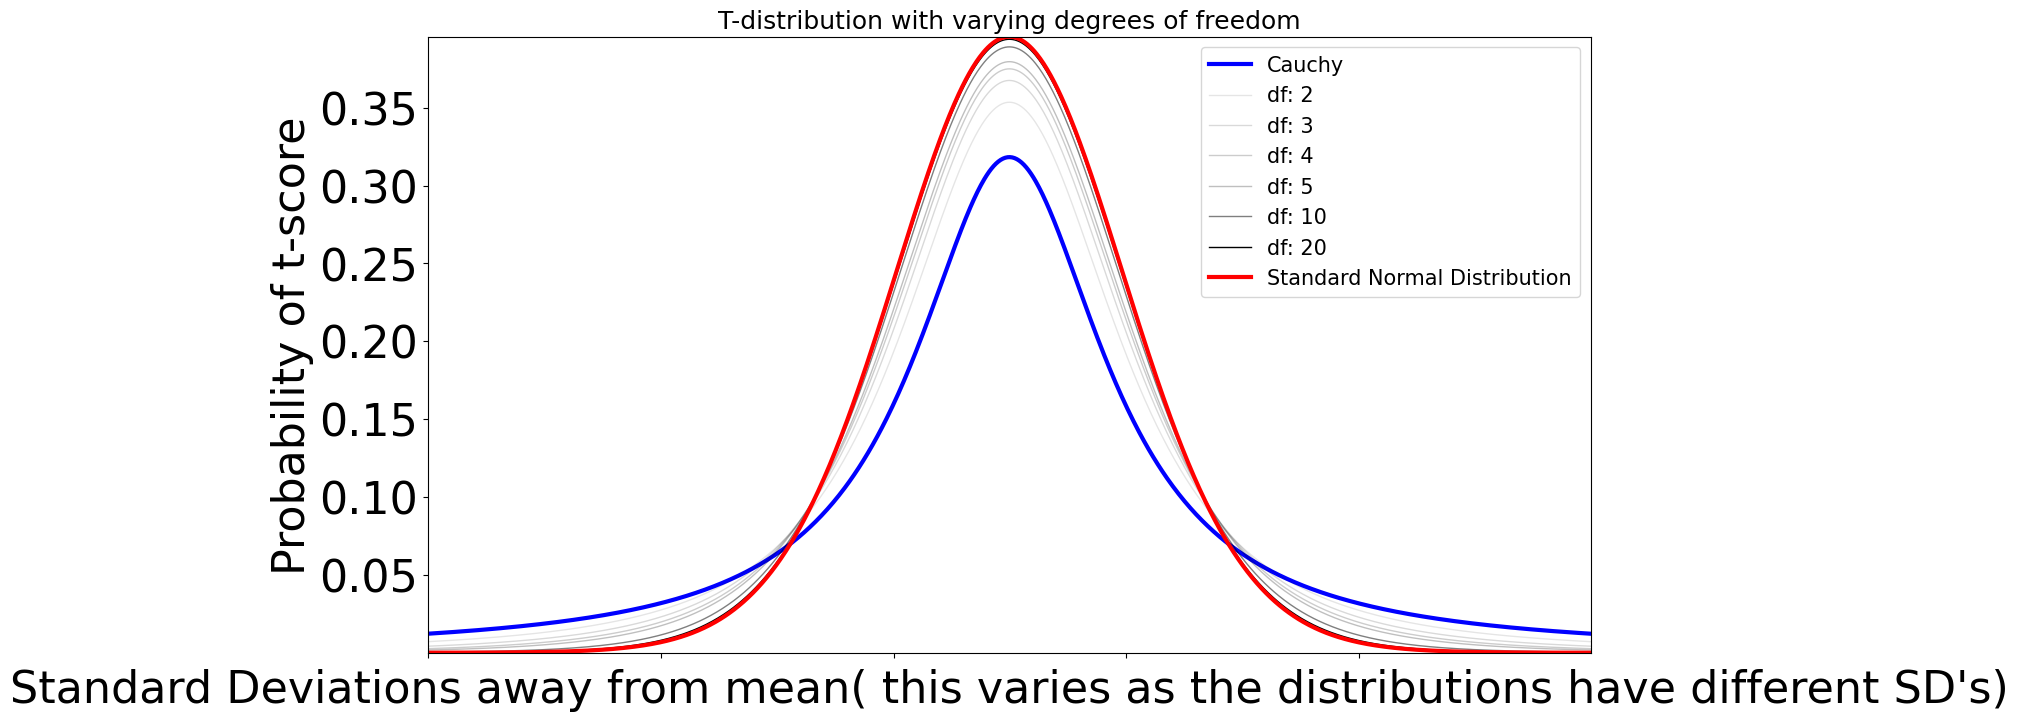

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

In [33]:
x = np.linspace(-5, 5, 1000)

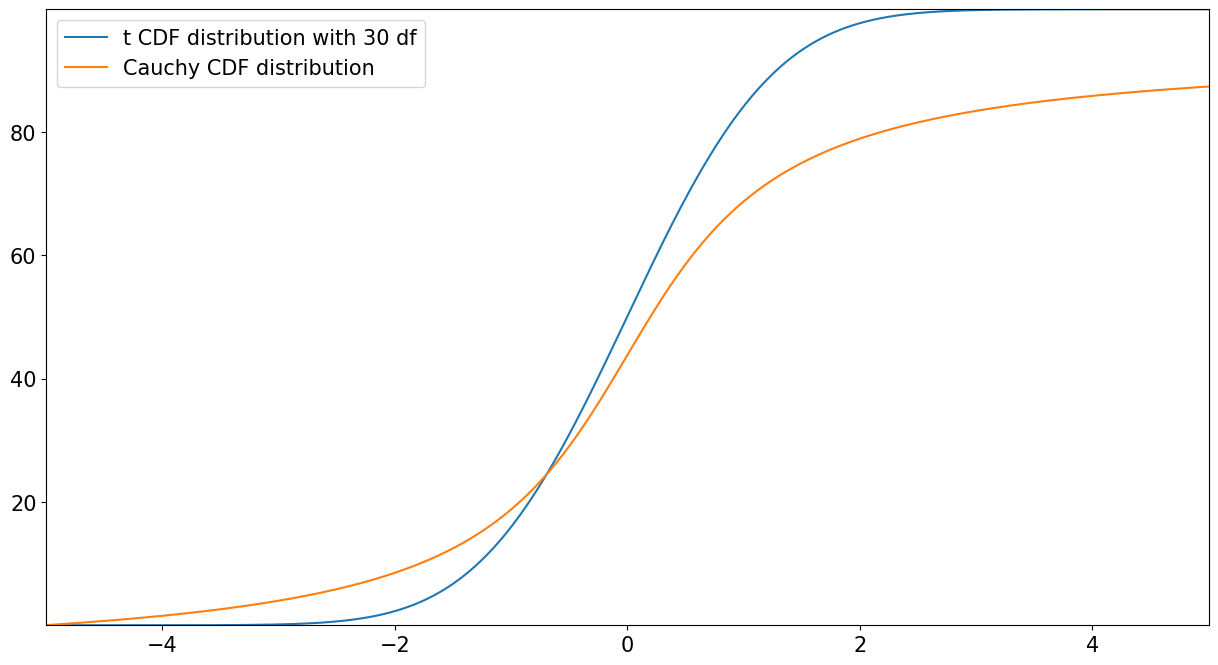

In [36]:
fig, ax = plt.subplots(figsize = (15, 8))

t_dist = t_distribution(150000, x)
cauchy = t_distribution(1,x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(x)):
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]
    
ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [37]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [38]:
hypothesized_rate = 1.07 **(1/12) - 1
t_test(sp500, hypothesized_rate, 'one_sample')

0.6958593521205105 478


'T-value: 0.6958593521205105, P-value: 0.48685580818447427, Fail to reject null hypothesis.'

### Testing for normality

In [4]:
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p

In [5]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

TypeError: string indices must be integers

### Confidence Intervals

In [44]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

In [45]:
def confidence_interval(data, alpha):
    n = len(data)
    df = n-1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [46]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [47]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12

In [48]:
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [49]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-12-31,NaN,0.373945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219249,...,NaN,NaN,NaN,NaN,0.444489,NaN,NaN,NaN,0.292460,0.253979
1982-12-31,NaN,-0.020714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010942,...,NaN,NaN,NaN,NaN,-0.155439,-0.012121,NaN,NaN,-0.008201,-0.105083
1983-12-31,NaN,0.192326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270907,...,NaN,NaN,NaN,NaN,0.013850,0.258291,NaN,NaN,0.181910,0.119646
1984-12-31,NaN,0.207397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250165,...,NaN,NaN,NaN,NaN,0.230555,0.247645,NaN,NaN,0.050682,0.170396
1985-12-31,NaN,-0.087750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007457,...,NaN,NaN,NaN,NaN,-0.244129,-0.258694,NaN,NaN,-0.022556,0.008075
1986-12-31,NaN,0.171686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221966,...,NaN,NaN,NaN,NaN,0.299125,0.243880,NaN,0.103741,0.230368,0.236968
1987-12-31,NaN,0.112441,0.024667,NaN,NaN,NaN,0.040800,NaN,0.121338,0.038209,...,NaN,NaN,NaN,NaN,0.496225,0.117398,NaN,0.172813,-0.087274,0.162006
1988-12-31,NaN,0.004728,0.002421,NaN,NaN,NaN,0.056241,NaN,0.017345,-0.016121,...,NaN,NaN,NaN,NaN,0.137327,0.085508,NaN,-0.001300,-0.351368,0.037784


NameError: name 'yearly_return_CIs' is not defined

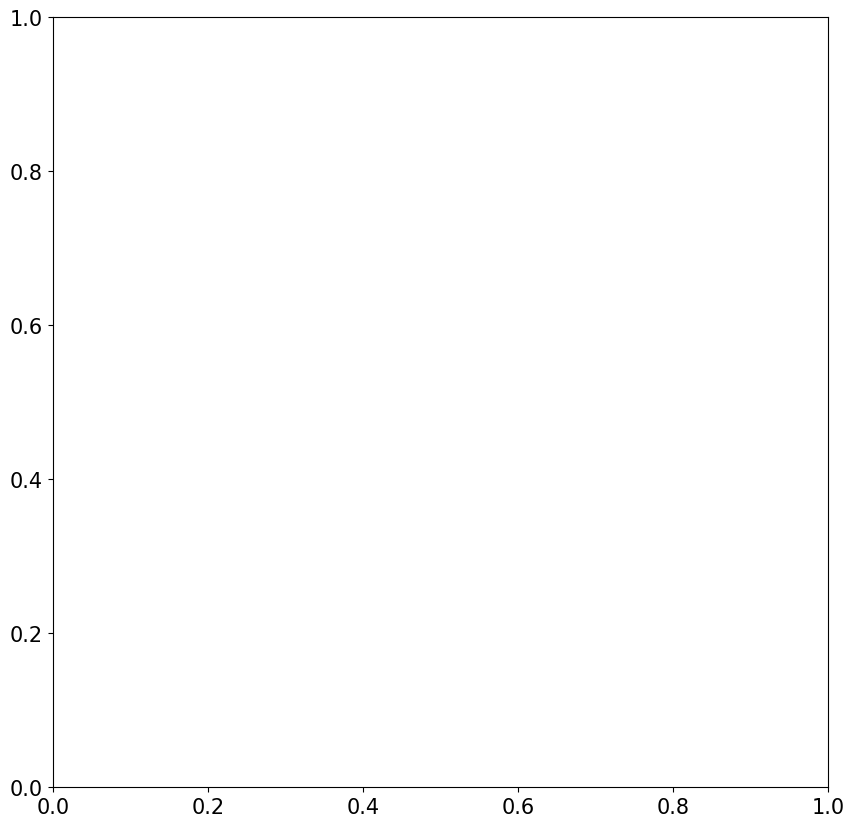

In [50]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# Anova

In [7]:
mutual_fund_data[["Symbol", "Morningstar Category"]]

NameError: name 'mutual_fund_data' is not defined

In [52]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [53]:
mutual_fund_data["Morningstar Category"].value_counts() > 2

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [6]:
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
fund_types

NameError: name 'mutual_fund_data' is not defined

In [54]:
fund_type = mutual_fund_data["Morningstar Category"].value_counts() > 2
relevant_fund_type = fund_types[fund_types]
relevant_fund = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]

relevant_fund_types

NameError: name 'fund_types' is not defined

In [55]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]
    

NameError: name 'relevant_fund_types' is not defined

In [56]:
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    
    fund_type_returns[key] = []
    
    for val in relevant_fund_type_names[key]:
        fund_type_returns[key].extend

In [57]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

[]

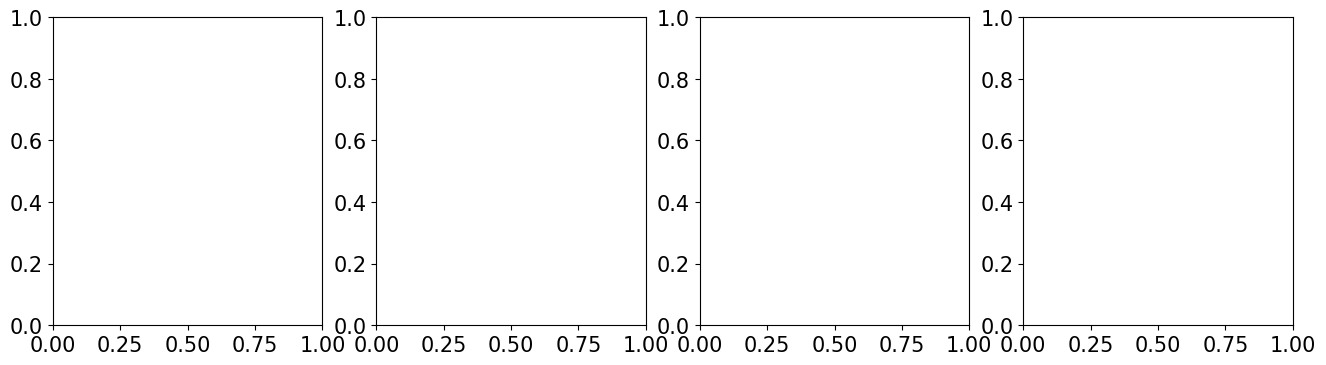

In [58]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    axs[num].hist(fund_type_returns[key], bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])

In [59]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k -1
    dfwn = N - k
    
    return k, N, dfbn, dfwn


In [60]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'

In [61]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)
    
    grand_mean = np.mean(alldata)
    
    for arg in args:
        group_mean = np.mean(arg)
        
        n = len(arg)
        val = n * (group_mean - grand_mean)**2
        
        ssn += val
        
    return ssb

In [62]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'

In [63]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [64]:
SSW(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'

In [65]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [66]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'

In [67]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [68]:
def anova(*args):
    k,N,dfbn,dfwn = get_anova_counts(*args)
    
    ssw,ssb,sst = get_sum_square_stats(*args)
    
    msb = ssb / dfbn
    msw = ssw / dfwn
    
    f = msb / msw
    
    return finish_anova(f,dfbn,dfwn)

In [69]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'

In [70]:
stats.f_oneway(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

KeyError: 'Large Growth'